In [2]:
import pandas as pd 
import numpy as np
#make pandas display all columns
pd.set_option('display.max_columns', None)

san_diego = pd.read_csv('san_diego_listing_cleaned.csv')
san_diego.head()

,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,6,North Park Craftsmen House * Great for Families,29,Sara,2008-03-03,within an hour,100%,100%,f,t,North Hills,32.75522,-117.12873,Entire home,Entire home/apt,6,2.0,2 baths,3.0,3.0,"[""Hair dryer"", ""Children\u2019s bikes"", ""GE ga...",199.0,1,30,1,14,14,275,153,0,0,4.81,4.82,4.71,4.99,4.97,4.77,4.80,0.78
1,12447,Cozy Getaway Pacific Beach Oasis!,48669,Jennifer,2009-10-27,within an hour,100%,90%,t,t,Pacific Beach,32.80533,-117.23400,Private room in condo,Private room,2,1.0,1 private bath,1.0,0.0,"[""Hair dryer"", ""Microwave"", ""Wifi"", ""Carbon mo...",96.0,6,365,5,17,17,162,2,1,1,5.00,4.00,5.00,5.00,5.00,5.00,5.00,0.01
2,29967,"Great home, 10 min walk to Beach",129123,Michael,2010-05-21,within an hour,100%,77%,t,t,Pacific Beach,32.80751,-117.25760,Entire bungalow,Entire home/apt,6,2.0,2 baths,2.0,3.0,"[""Free parking on premises"", ""Hair dryer"", ""Sh...",227.0,4,365,3,22,47,322,107,14,0,4.77,4.74,4.57,4.93,4.93,4.82,4.77,0.63
3,54001,"La Jolla Cottage, 3Blks 2 Ocean; 2bd1bth, Stei...",252692,Marsha,2010-10-04,within a few hours,100%,78%,t,t,La Jolla,32.81301,-117.26856,Entire guesthouse,Entire home/apt,2,1.0,1 bath,2.0,3.0,"[""Ceiling fan"", ""Hair dryer"", ""Portable heater...",191.0,4,30,1,7,20,49,330,21,2,4.93,4.92,4.94,4.97,4.96,4.97,4.88,2.01
4,62949,Pacific Beach Cozy Private Hideaway Free Bikes,21532,Lisa,2009-06-14,within an hour,100%,97%,t,t,Pacific Beach,32.80621,-117.23372,Entire guest suite,Entire home/apt,2,1.0,1 bath,0.0,0.0,"[""Hair dryer"", ""Portable heater"", ""Self check-...",115.0,1,4,6,20,41,41,1082,120,7,4.86,4.91,4.85,4.96,4.95,4.83,4.81,7.51


In [3]:
numeric_df = san_diego.drop(columns=["id", "name", "host_name", "amenities", "host_since", "bathrooms_text"], axis=1)

numeric_df["host_response_rate"] = numeric_df["host_response_rate"].str.replace("%", "").astype(float)
numeric_df["host_acceptance_rate"] = numeric_df["host_acceptance_rate"].str.replace("%", "").astype(float)

dummy_cols = ["host_response_time", "host_is_superhost", "host_identity_verified", "neighbourhood_cleansed", "property_type", "room_type"]
numeric_df = pd.get_dummies(numeric_df, columns=dummy_cols)

#print categorical columns
print(numeric_df.select_dtypes(include=['object']).columns)
for col in numeric_df.select_dtypes(include=['object']).columns:
    print(numeric_df[col].value_counts())


Index([], dtype='object')


In [4]:
#co
#Find correlation matrix
corr_matrix = numeric_df.corr()
print(corr_matrix.shape)

#Find the most correlated features with price
corr_price = corr_matrix["price"].sort_values(ascending=False)
print("10 most positively correlated features with price")
print(corr_price[:10])
print("10 most negatively correlated features with price")
print(corr_price[-10:])

(190, 190)
10 most positively correlated features with price
price                                 1.000000
bathrooms                             0.646012
bedrooms                              0.610507
accommodates                          0.595608
beds                                  0.561226
property_type_Entire home             0.306324
neighbourhood_cleansed_Mission Bay    0.232610
neighbourhood_cleansed_La Jolla       0.213011
room_type_Entire home/apt             0.208830
property_type_Entire villa            0.176031
Name: price, dtype: float64
10 most negatively correlated features with price
minimum_nights                       -0.099234
property_type_Entire guesthouse      -0.103768
number_of_reviews_l30d               -0.111351
number_of_reviews_ltm                -0.127882
property_type_Entire rental unit     -0.133304
number_of_reviews                    -0.141201
reviews_per_month                    -0.148438
property_type_Private room in home   -0.164061
room_type_Priva

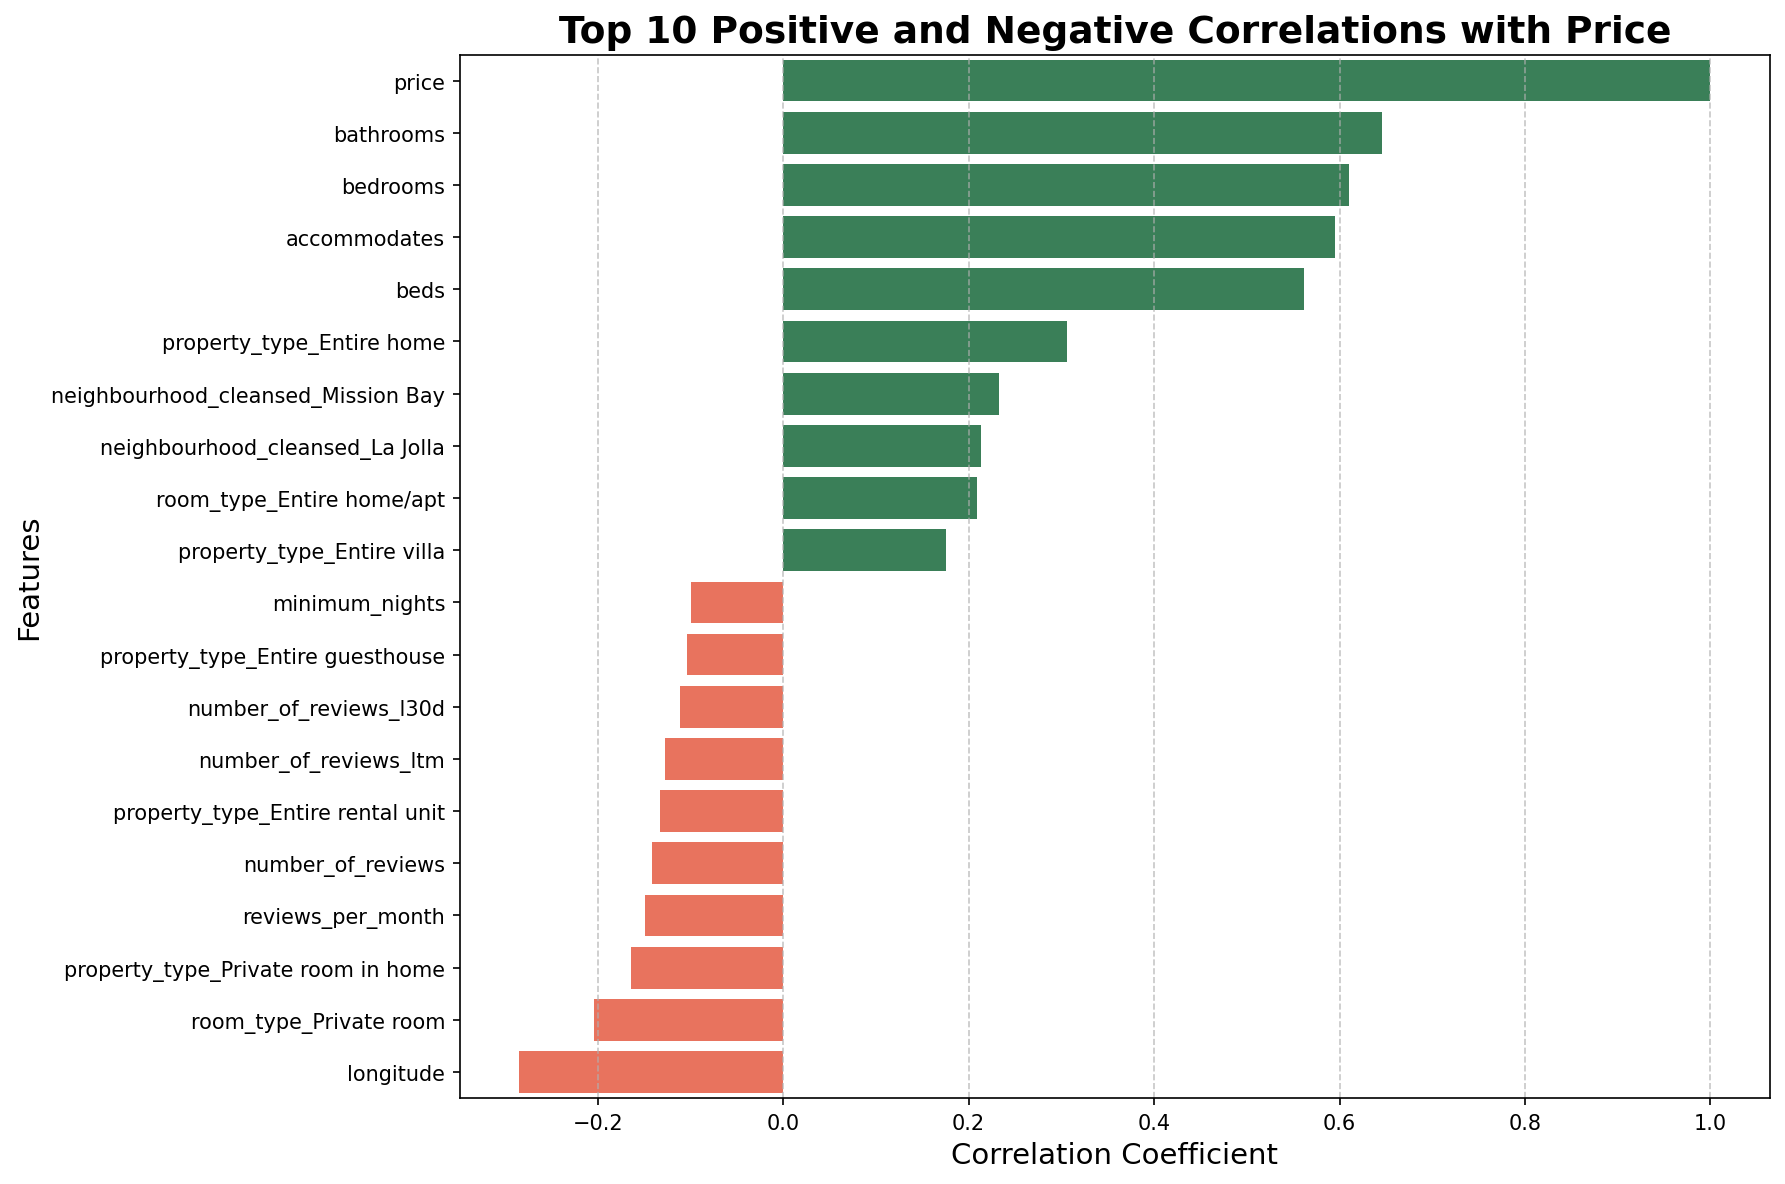

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the 10 most positively and negatively correlated features with price
positive_corr = corr_price[:10]
negative_corr = corr_price[-10:]

# Combine both into a single dataframe for visualization
combined_corr = pd.concat([positive_corr, negative_corr])

# Increase figure DPI for better resolution
plt.figure(figsize=(12, 8), dpi=150)

# Create the horizontal bar chart with improved styling
sns.barplot(
    x=combined_corr.values,
    y=combined_corr.index,
    palette=["#2E8B57" if val > 0 else "#FF6347" for val in combined_corr.values]
)

# Add title and labels with larger font sizes
plt.title('Top 10 Positive and Negative Correlations with Price', fontsize=18, weight='bold')
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Enhance grid readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# Correlations with price analysis

## Positively correlated

1. bathrooms and bedrooms are very positively correlated. Bigger stay = more expensive.
2. The neighborhoods of Mission Bay and La Jolla are the most expensive neighborhoods.
3. The room_type / property type eiother being an entire home or entire villa also increases price.

## Negatively correlated

1. Longitude in this dataset is negative, this negative correlation means house closer to the coast are more expensive, which makes sense. 
2. Private rooms are negatively correlated, indicating they are significantly cheaper than other types of stays. 
3. Multiple columns indicating the number of reviews in a certain time period are negatively correlated. Indicating that the more reviews a place gets the cheaper it will be. This could be because cheaper places have more number of stays in general, therefore more reviews.
4. Property types of "Entire guesthouse" and "Entire rental unit" also seem to be cheaper. 

In [7]:
corr_rating = corr_matrix["review_scores_rating"].sort_values(ascending=False)
print("10 most positively correlated features with review_scores_rating")
print(corr_rating[:10])
print("10 most negatively correlated features with review_scores_rating")
print(corr_rating[-10:])


#drop review_scores_* and host_is_superhost_* columns
corr_rating = corr_rating.drop(index=corr_rating.index[corr_rating.index.str.contains("review_scores")])
corr_rating = corr_rating.drop(index=corr_rating.index[corr_rating.index.str.contains("host_is_superhost")])
print("10 most positively correlated features with review_scores_rating without review_scores_* and host_is_superhost_* columns")
print(corr_rating[:10])
print("10 most negatively correlated features with review_scores_rating without review_scores_* and host_is_superhost_* columns")
print(corr_rating[-10:])

10 most positively correlated features with review_scores_rating
review_scores_rating           1.000000
review_scores_accuracy         0.847966
review_scores_value            0.833266
review_scores_cleanliness      0.781260
review_scores_communication    0.736617
review_scores_checkin          0.688059
review_scores_location         0.520114
host_is_superhost_t            0.311527
number_of_reviews_l30d         0.133770
number_of_reviews_ltm          0.113518
Name: review_scores_rating, dtype: float64
10 most negatively correlated features with review_scores_rating
property_type_Room in hotel         -0.082378
property_type_Entire rental unit    -0.084673
property_type_Shared room in home   -0.085829
room_type_Hotel room                -0.088814
maximum_nights                      -0.103015
availability_365                    -0.117738
availability_90                     -0.159873
availability_60                     -0.180590
availability_30                     -0.187202
host_is_super

# Rating Correlations

The columns review_scores_accuracy review_scores_value review_scores_cleanliness review_scores_communication  review_scores_checkin review_scores_location are all reviews for specific "categories", so it makes sense these would all be highly correlated with the overall review. Also host_is_superhost is purely based off of review value (>4.8 = superhost), so it makes sense the host_is_superhost_t and host_is_superhost_f is positively / negatively correlated. 

So I removed these columns are reprinted correlation coefficients

## Positive Correlations

1. Multiple columns indicating number of reviews means more positive overall review. This could be because better places get more people, that leave better reviews that attracts more people.
2. Property types of "home", "guest house", and "guest suite" get better reviews. Not sure why
3. Longitude is positively correlated, meaning houses closer to coast have better ratings
4. host_response_rate is positively correlated, makes sense a more attentive host is reviewed better

## Negative Correlations
1. Multiple availability columns are highly negatively correlated. Means worse reviews with more availability. It makes sense a place with bad reviews does not get booked often. 
2. Maximum nights is negatively correlated. Not sure why.
3. "Hotel room", "Shared room", "Entire rental unit" and "Room in hotel" are all highly negatively correlated. Maybe people do not like smaller stays. 

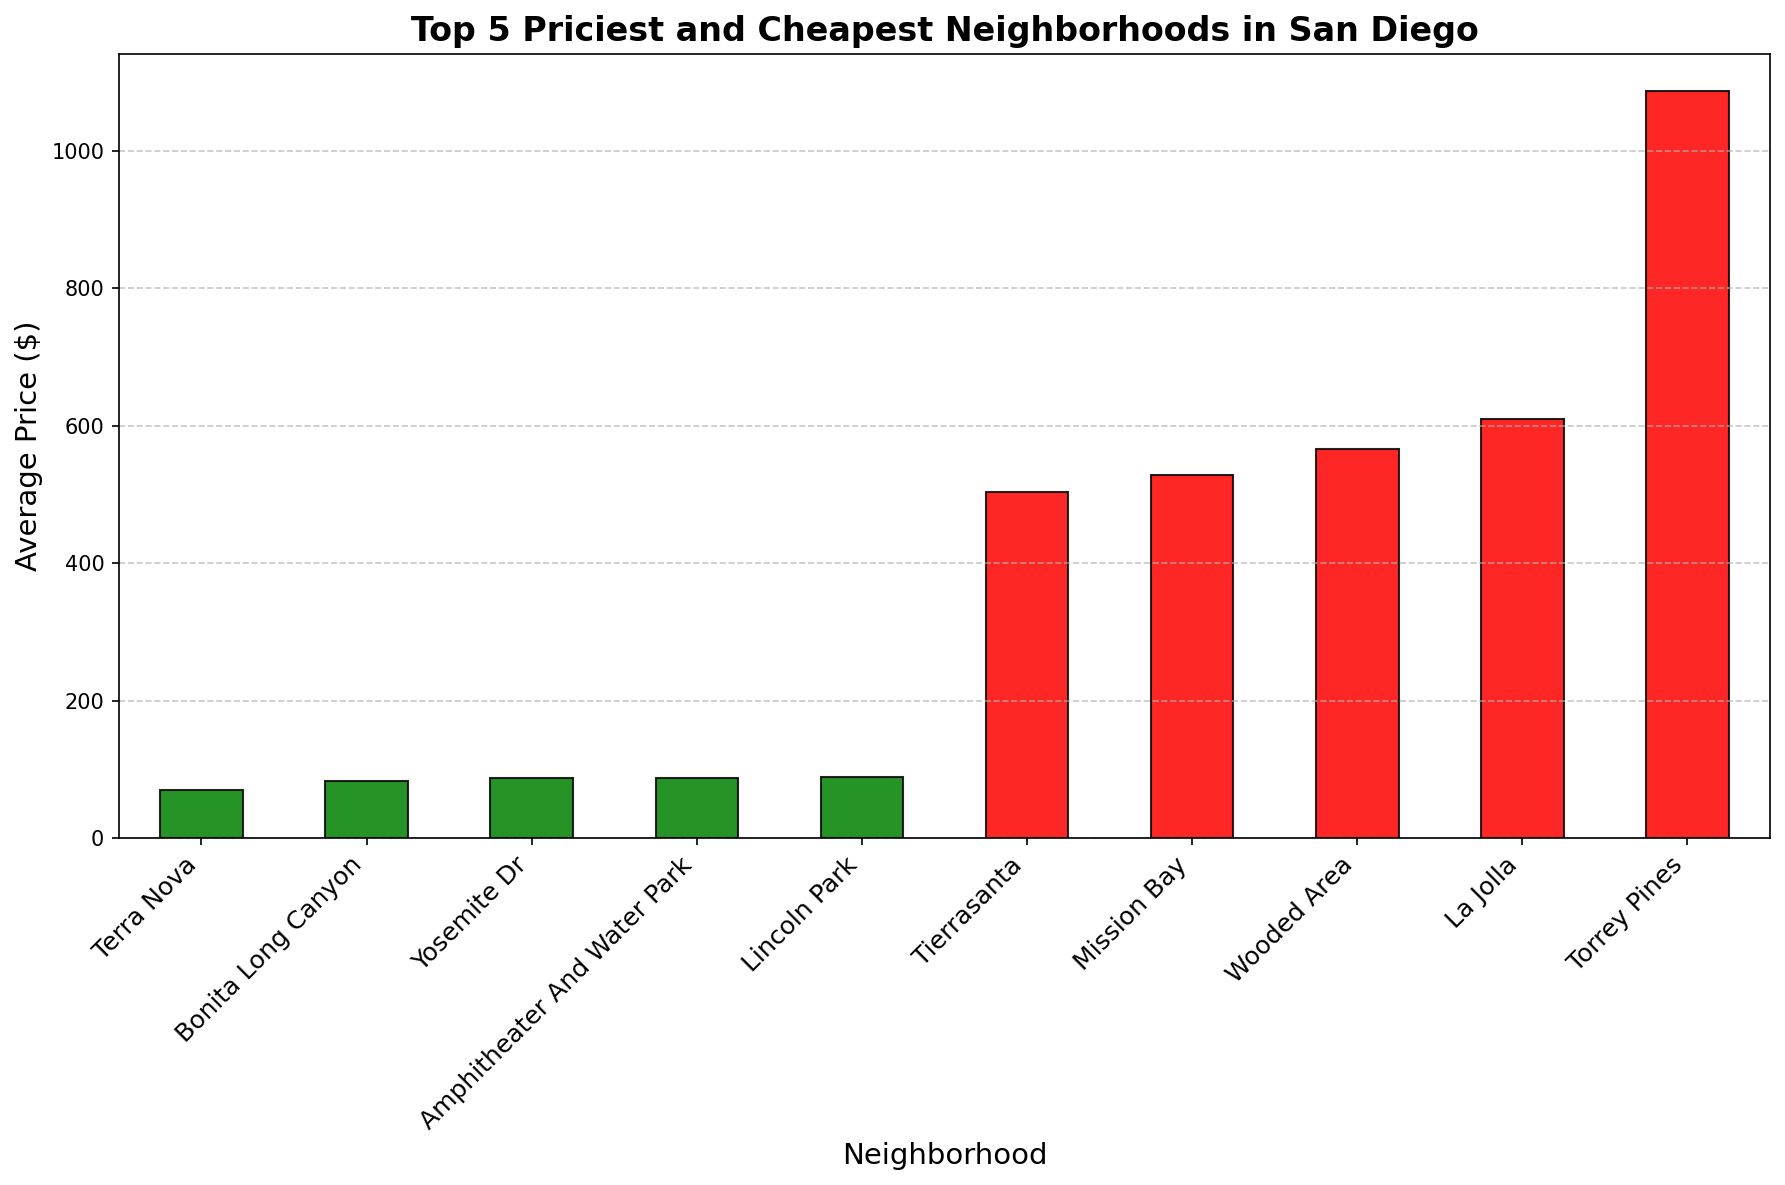

In [19]:
import matplotlib.pyplot as plt

# Group by neighborhood and calculate the average price
avg_price_by_neighborhood = san_diego.groupby("neighbourhood_cleansed")["price"].mean().sort_values()

# Get the cheapest 5 neighborhoods
cheapest_neighborhoods = avg_price_by_neighborhood.head(5)

# Get the top 5 priciest neighborhoods
priciest_neighborhoods = avg_price_by_neighborhood.tail(5)

# Combine the two groups
combined_neighborhoods = pd.concat([cheapest_neighborhoods, priciest_neighborhoods])

# Increase DPI for higher resolution
plt.figure(figsize=(12, 8), dpi=150)

# Plot the data with enhanced styling
combined_neighborhoods.plot(
    kind='bar', 
    color=['green'] * 5 + ['red'] * 5, 
    edgecolor='black',
    alpha=0.85  # Slight transparency for visual appeal
)

# Add title and axis labels with larger fonts
plt.title('Top 5 Priciest and Cheapest Neighborhoods in San Diego', fontsize=16, weight='bold')
plt.ylabel('Average Price ($)', fontsize=14)
plt.xlabel('Neighborhood', fontsize=14)

# Improve x-tick readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ensure layout fits well
plt.tight_layout()

# Show the plot
plt.show()


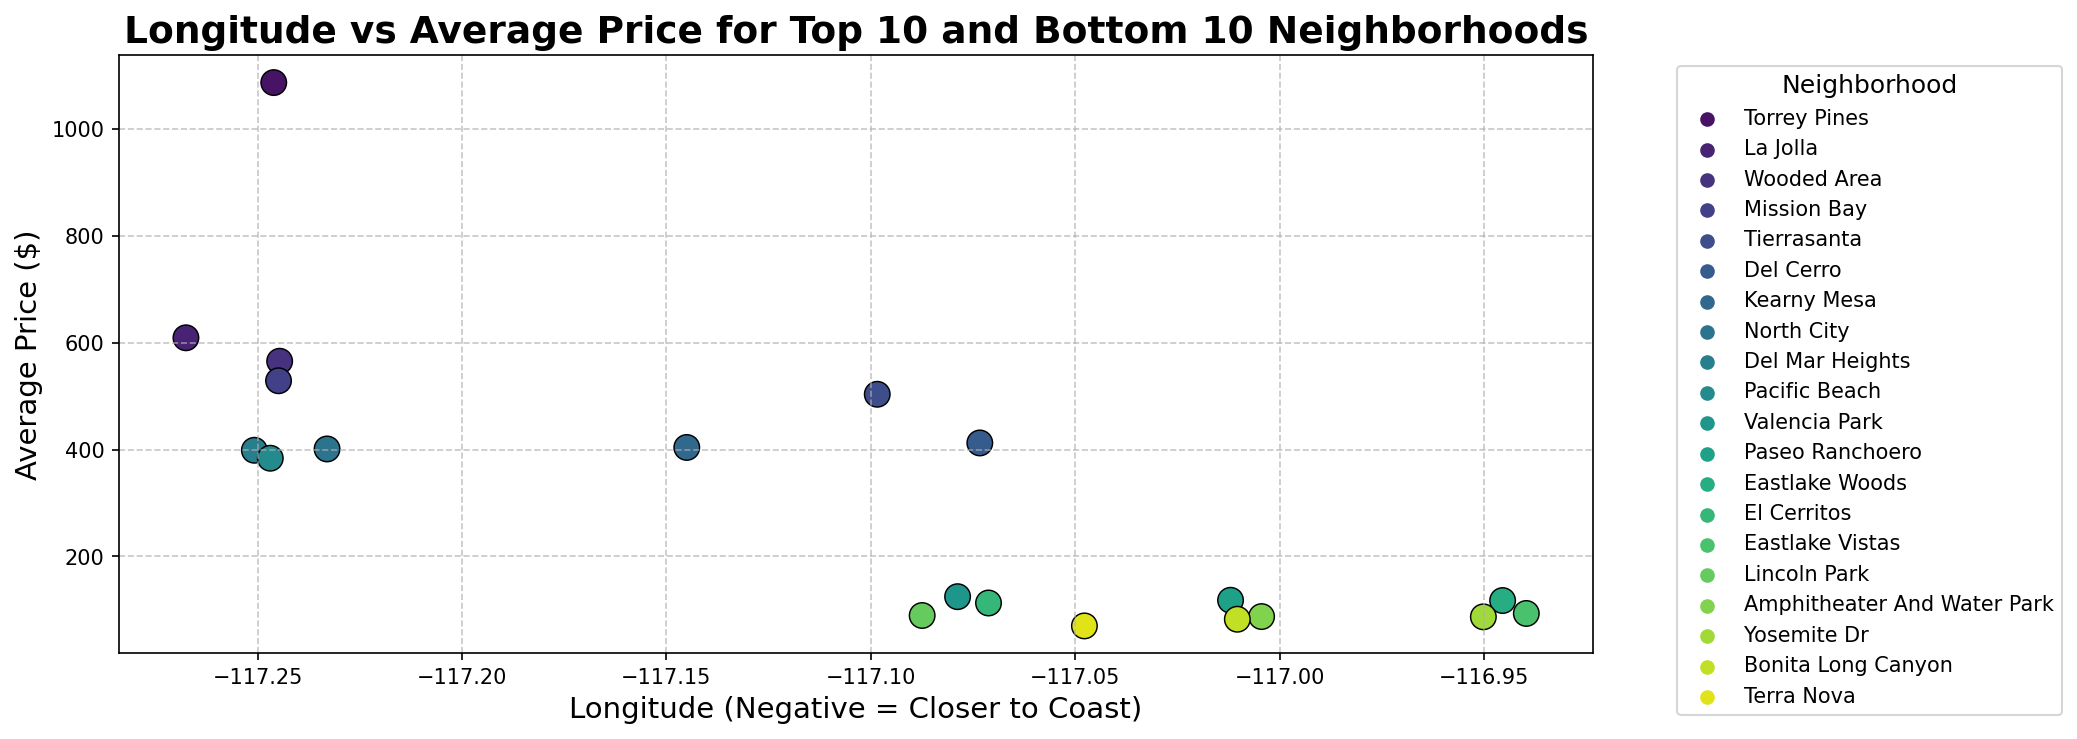

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by neighborhoods and calculate average price and longitude
neighborhood_stats = san_diego.groupby('neighbourhood_cleansed')[['price', 'longitude']].mean().reset_index()

# Sort neighborhoods by average price
sorted_neighborhoods = neighborhood_stats.sort_values(by='price', ascending=False)

# Select top 10 and bottom 10 neighborhoods
top_10_neighborhoods = sorted_neighborhoods.head(10)
bottom_10_neighborhoods = sorted_neighborhoods.tail(10)

# Combine top and bottom neighborhoods for plotting
selected_neighborhoods = pd.concat([top_10_neighborhoods, bottom_10_neighborhoods])

# Set a higher resolution for better image quality
plt.figure(figsize=(14, 5.10), dpi=150)

# Plot a scatterplot of longitude vs. price with enhanced design
sns.scatterplot(
    data=selected_neighborhoods,
    x='longitude',
    y='price',
    hue='neighbourhood_cleansed',
    palette='viridis',
    s=150,  # Increase marker size
    edgecolor='black',  # Add edge color for better contrast
    linewidth=0.7
)

# Add labels and title with larger fonts
plt.title('Longitude vs Average Price for Top 10 and Bottom 10 Neighborhoods', fontsize=18, weight='bold')
plt.xlabel('Longitude (Negative = Closer to Coast)', fontsize=14)
plt.ylabel('Average Price ($)', fontsize=14)

# Customize the legend for better readability
plt.legend(
    title='Neighborhood', 
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    fontsize=10, 
    title_fontsize=12, 
    frameon=True
)

# Add grid for better reference
plt.grid(linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


Neighborhoods in Each Tier:
tier
Tier 1 (Lowest)     [Amphitheater And Water Park, Bonita Long Cany...
Tier 2              [Balboa Park, Bario Logan, City Heights East, ...
Tier 3              [Allied Gardens, Alta Vista, Bay Ho, Carmel Mo...
Tier 4              [Bay Terrace, Bird Land, Carmel Valley, Columb...
Tier 5 (Highest)    [Bay Park, Del Cerro, Del Mar Heights, Estlake...
Name: neighbourhood_cleansed, dtype: object


/tmp/ipykernel_121/2211941853.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_stats = neighborhood_stats.groupby('tier').agg(
/tmp/ipykernel_121/2211941853.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_neighborhoods = neighborhood_stats.groupby('tier')['neighbourhood_cleansed'].apply(list)


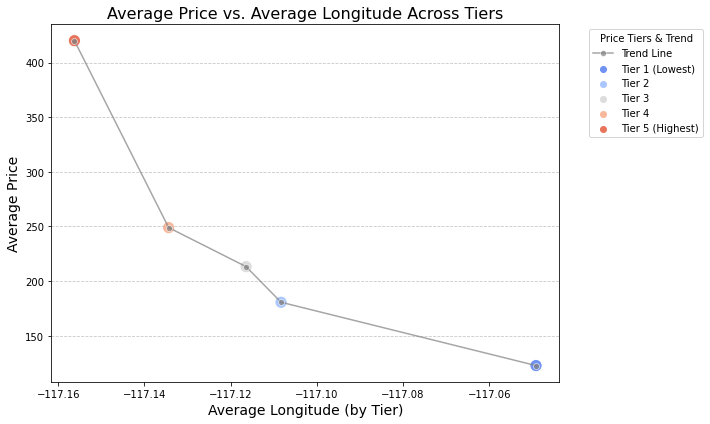

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by neighborhood and calculate average price and longitude
neighborhood_stats = san_diego.groupby('neighbourhood_cleansed').agg(
    avg_price=('price', 'mean'),
    avg_longitude=('longitude', 'mean')
).reset_index()

# Divide neighborhoods into 5 tiers based on average price
neighborhood_stats['tier'] = pd.qcut(neighborhood_stats['avg_price'], 5, labels=["Tier 1 (Lowest)", "Tier 2", "Tier 3", "Tier 4", "Tier 5 (Highest)"])

# Calculate average longitude and average price for each tier
tier_stats = neighborhood_stats.groupby('tier').agg(
    avg_price=('avg_price', 'mean'),
    avg_longitude=('avg_longitude', 'mean')
).reset_index()

# Display neighborhoods in each tier
tier_neighborhoods = neighborhood_stats.groupby('tier')['neighbourhood_cleansed'].apply(list)
print("Neighborhoods in Each Tier:")
print(tier_neighborhoods)

# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tier_stats, x='avg_longitude', y='avg_price', hue='tier', palette='coolwarm', s=150)

# Overlay a line connecting the tiers
sns.lineplot(data=tier_stats, x='avg_longitude', y='avg_price', color='gray', marker='o', linestyle='-', label='Trend Line', alpha=0.7)

# Add labels and title
plt.title('Average Price vs. Average Longitude Across Tiers', fontsize=16)
plt.xlabel('Average Longitude (by Tier)', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.legend(title='Price Tiers & Trend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



/tmp/ipykernel_121/87816837.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_stats = df.groupby('tier').agg(


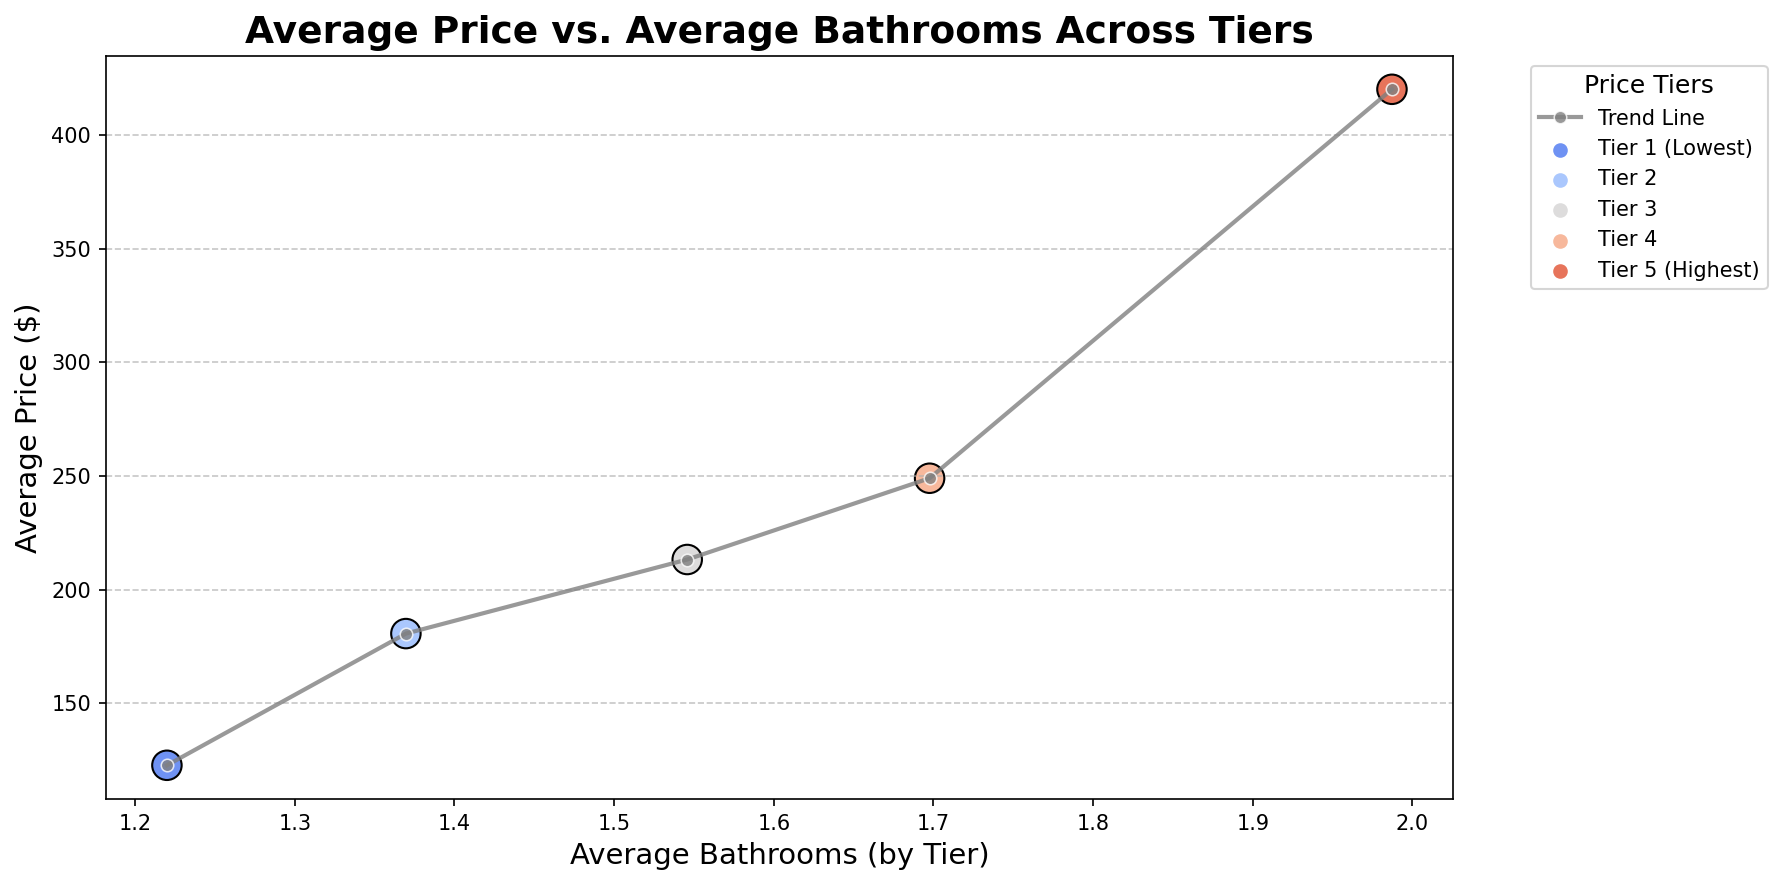

/tmp/ipykernel_121/87816837.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_stats = df.groupby('tier').agg(


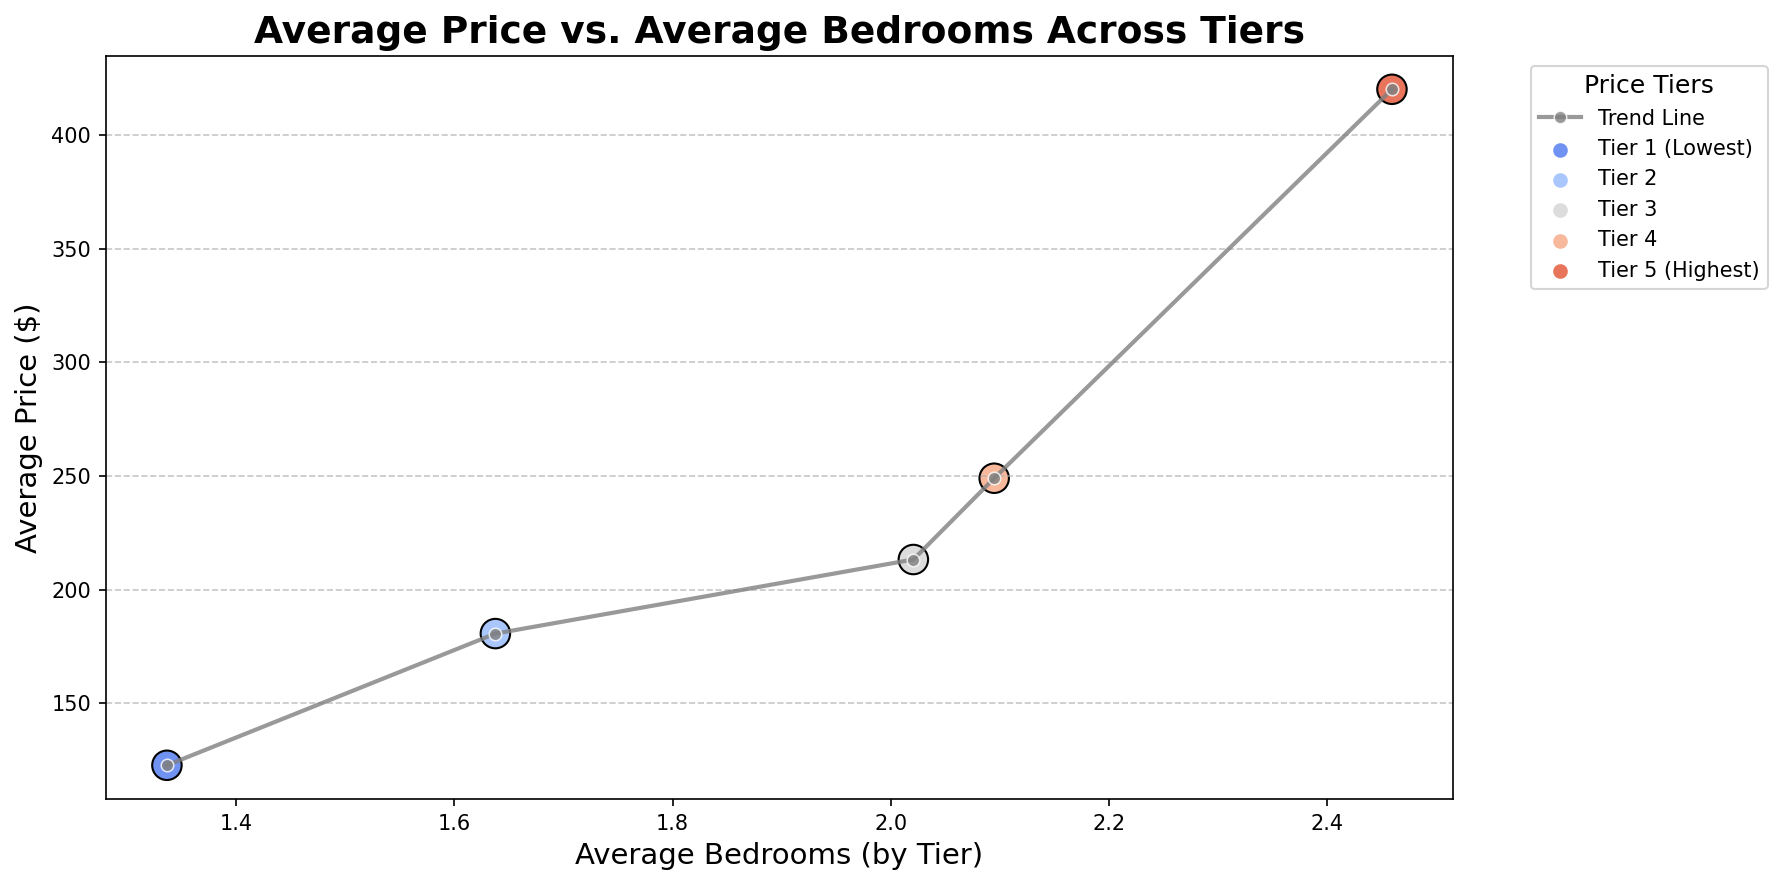

/tmp/ipykernel_121/87816837.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_stats = df.groupby('tier').agg(


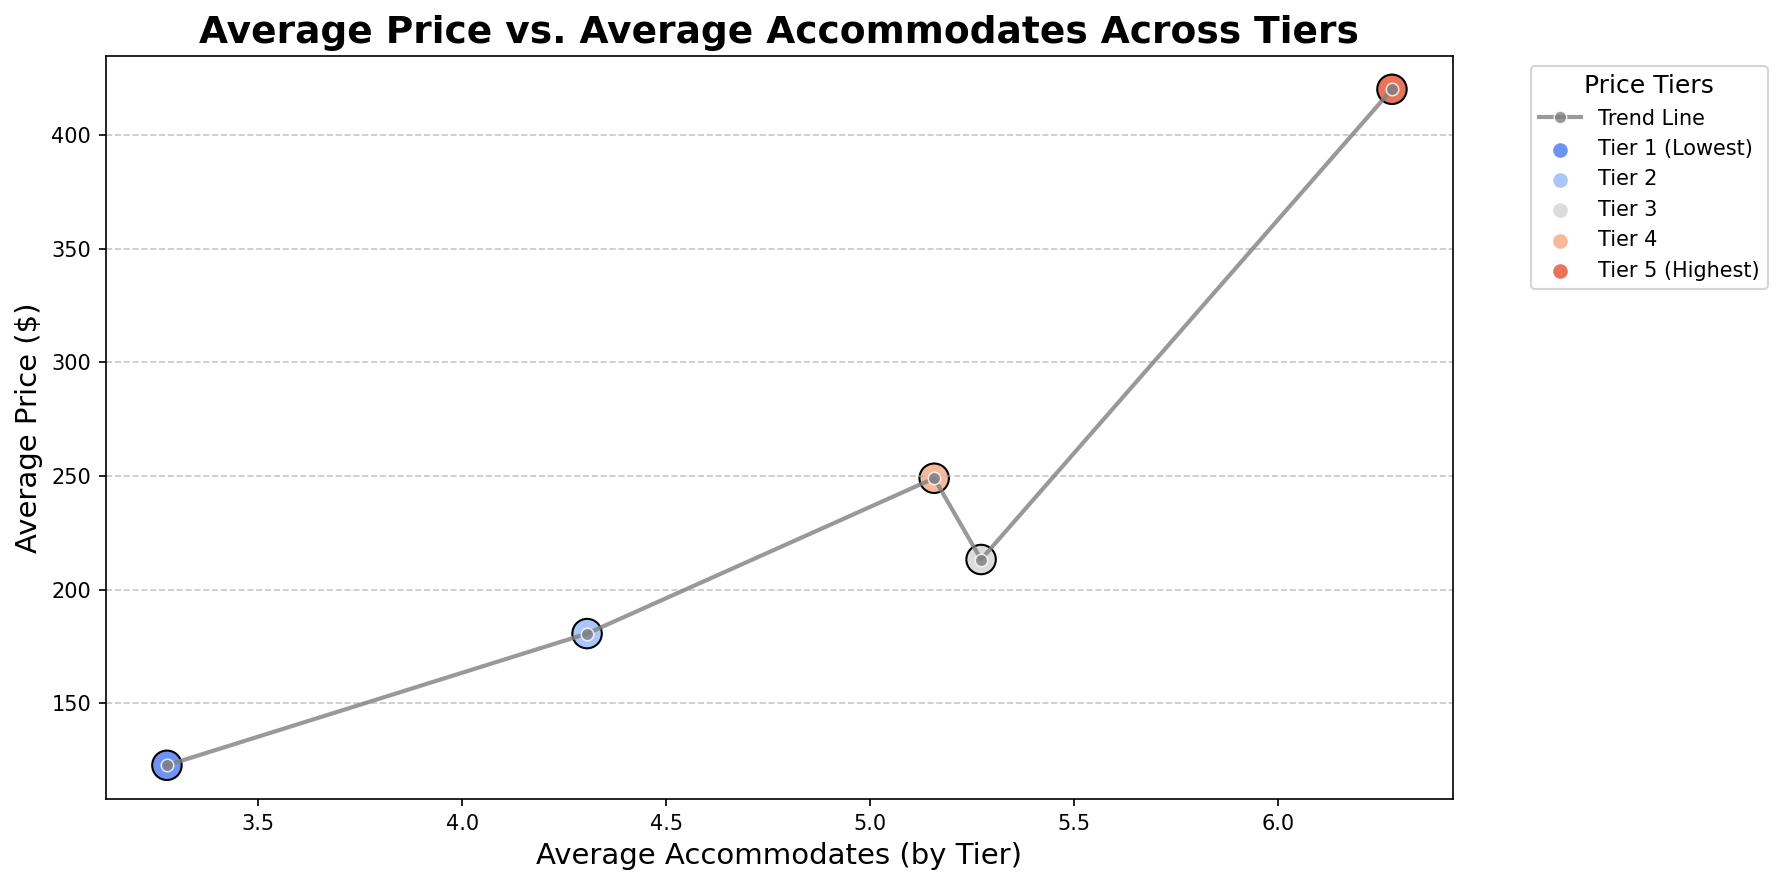

/tmp/ipykernel_121/87816837.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_stats = df.groupby('tier').agg(


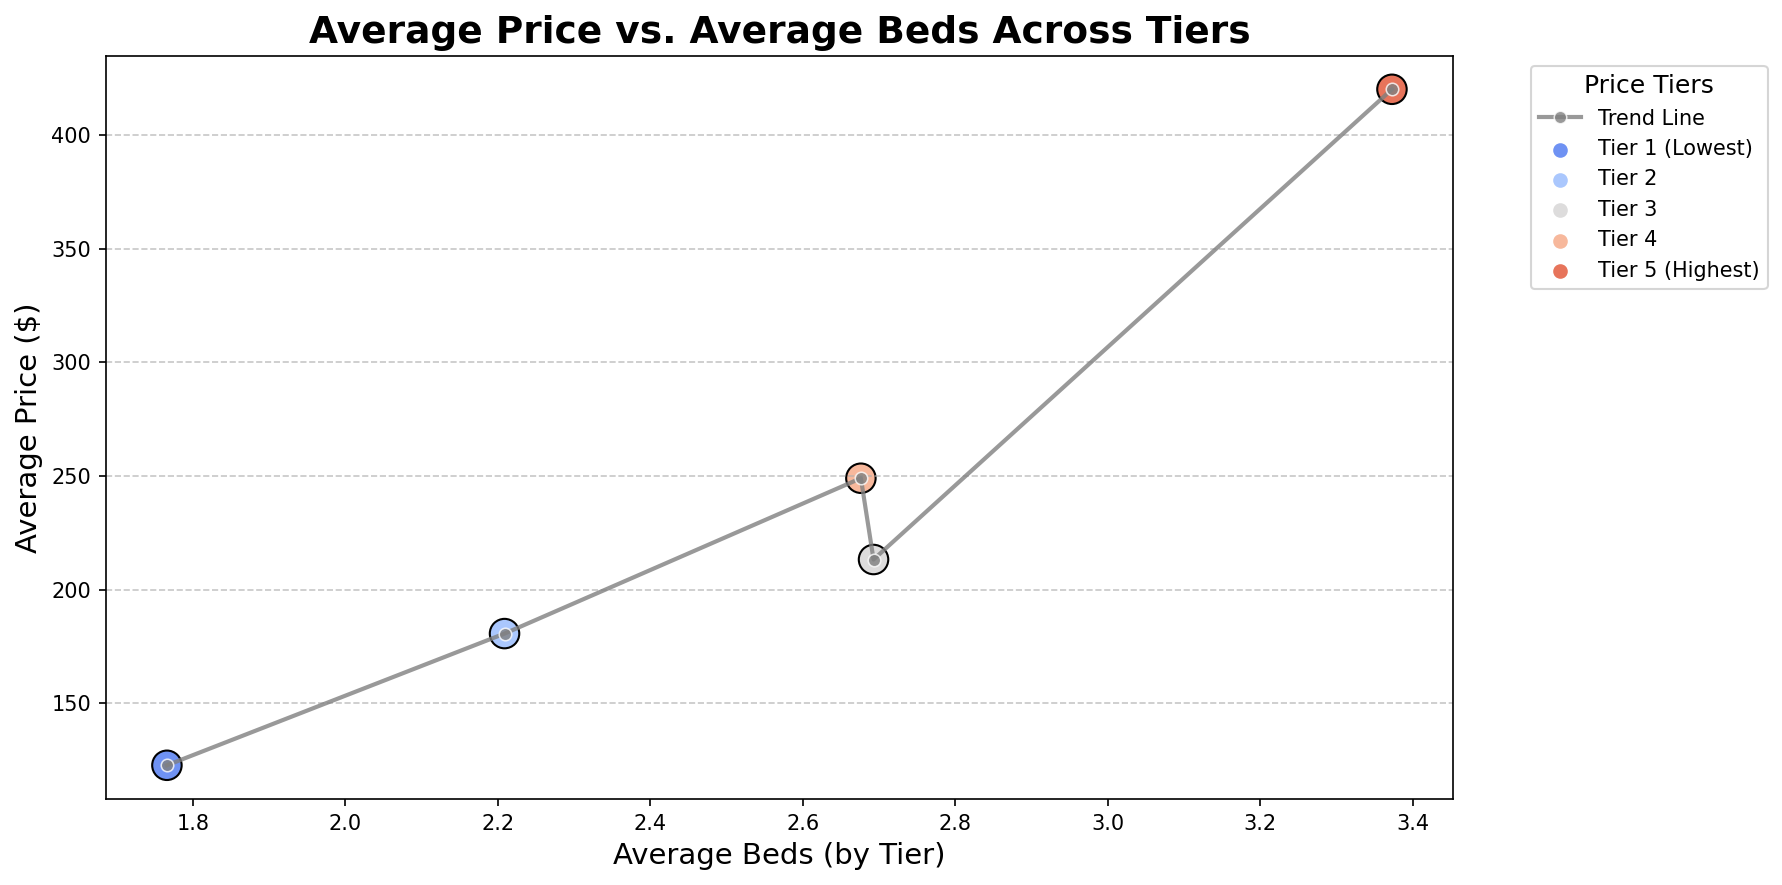

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by neighborhood and calculate average price, bathrooms, bedrooms, accommodates, and beds
neighborhood_stats = san_diego.groupby('neighbourhood_cleansed').agg(
    avg_price=('price', 'mean'),
    avg_bathrooms=('bathrooms', 'mean'),
    avg_bedrooms=('bedrooms', 'mean'),
    avg_accommodates=('accommodates', 'mean'),
    avg_beds=('beds', 'mean')  # Added beds
).reset_index()

# Divide neighborhoods into 5 tiers based on average price
neighborhood_stats['tier'] = pd.qcut(neighborhood_stats['avg_price'], 5, labels=["Tier 1 (Lowest)", "Tier 2", "Tier 3", "Tier 4", "Tier 5 (Highest)"])

# Define a function to create the desired plots with enhancements
def plot_relationship_with_tiers(df, feature, feature_label):
    # Calculate average feature and average price for each tier
    tier_stats = df.groupby('tier').agg(
        avg_price=('avg_price', 'mean'),
        avg_feature=(feature, 'mean')
    ).reset_index()

    # Increase resolution
    plt.figure(figsize=(12, 6), dpi=150)

    # Plot scatterplot
    sns.scatterplot(
        data=tier_stats,
        x='avg_feature',
        y='avg_price',
        hue='tier',
        palette='coolwarm',
        s=200,
        edgecolor='black',  # Marker edges for better contrast
        linewidth=1
    )

    # Overlay a line connecting the tiers
    sns.lineplot(
        data=tier_stats,
        x='avg_feature',
        y='avg_price',
        color='gray',
        marker='o',
        linestyle='-',
        linewidth=2,
        label='Trend Line',
        alpha=0.8
    )

    # Add labels and title
    plt.title(f'Average Price vs. Average {feature_label} Across Tiers', fontsize=18, weight='bold')
    plt.xlabel(f'Average {feature_label} (by Tier)', fontsize=14)
    plt.ylabel('Average Price ($)', fontsize=14)

    # Customize legend
    plt.legend(
        title='Price Tiers',
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        fontsize=10,
        title_fontsize=12,
        frameon=True
    )

    # Add grid for clarity
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

# Create plots for bathrooms, bedrooms, accommodates, and beds
plot_relationship_with_tiers(neighborhood_stats, 'avg_bathrooms', 'Bathrooms')
plot_relationship_with_tiers(neighborhood_stats, 'avg_bedrooms', 'Bedrooms')
plot_relationship_with_tiers(neighborhood_stats, 'avg_accommodates', 'Accommodates')
plot_relationship_with_tiers(neighborhood_stats, 'avg_beds', 'Beds')  # Added beds plot


/tmp/ipykernel_121/3883669213.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_stats = df.groupby('tier').agg(


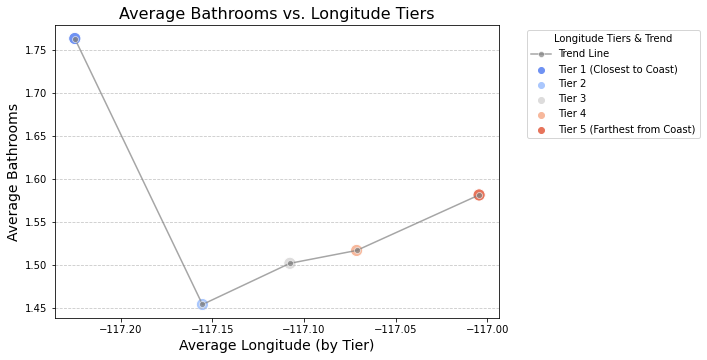

/tmp/ipykernel_121/3883669213.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_stats = df.groupby('tier').agg(


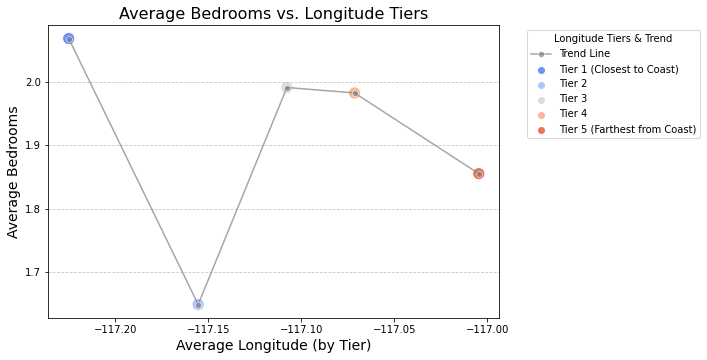

/tmp/ipykernel_121/3883669213.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_stats = df.groupby('tier').agg(


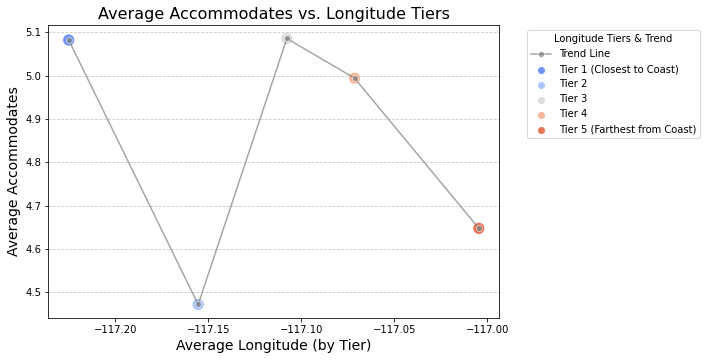

/tmp/ipykernel_121/3883669213.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_stats = df.groupby('tier').agg(


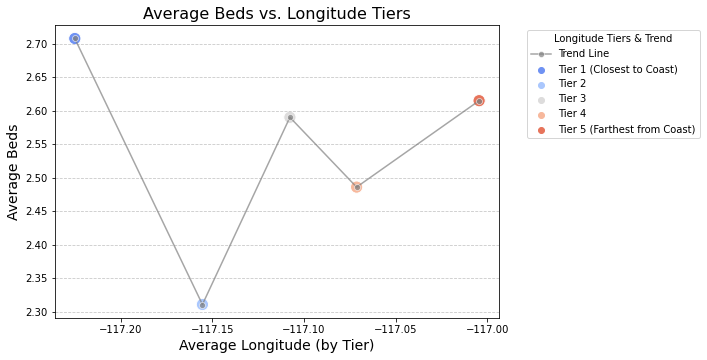

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group by neighborhood and calculate average longitude, bathrooms, bedrooms, accommodates, and beds
neighborhood_stats = san_diego.groupby('neighbourhood_cleansed').agg(
    avg_longitude=('longitude', 'mean'),
    avg_bathrooms=('bathrooms', 'mean'),
    avg_bedrooms=('bedrooms', 'mean'),
    avg_accommodates=('accommodates', 'mean'),
    avg_beds=('beds', 'mean')
).reset_index()

# Divide neighborhoods into 5 tiers based on average longitude
neighborhood_stats['tier'] = pd.qcut(neighborhood_stats['avg_longitude'], 5, labels=["Tier 1 (Closest to Coast)", "Tier 2", "Tier 3", "Tier 4", "Tier 5 (Farthest from Coast)"])

# Define a function to plot the relationship for each feature
def plot_relationship_with_longitude_tiers(df, feature, feature_label):
    # Calculate average feature and longitude for each tier
    tier_stats = df.groupby('tier').agg(
        avg_longitude=('avg_longitude', 'mean'),
        avg_feature=(feature, 'mean')
    ).reset_index()

    # Plot the scatterplot
    plt.figure(figsize=(10, 5.1))
    sns.scatterplot(data=tier_stats, x='avg_longitude', y='avg_feature', hue='tier', palette='coolwarm', s=150)

    # Overlay a line connecting the tiers
    sns.lineplot(data=tier_stats, x='avg_longitude', y='avg_feature', color='gray', marker='o', linestyle='-', label='Trend Line', alpha=0.7)

    # Add labels and title
    plt.title(f'Average {feature_label} vs. Longitude Tiers', fontsize=16)
    plt.xlabel('Average Longitude (by Tier)', fontsize=14)
    plt.ylabel(f'Average {feature_label}', fontsize=14)
    plt.legend(title='Longitude Tiers & Trend', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Create plots for bathrooms, bedrooms, accommodates, and beds
plot_relationship_with_longitude_tiers(neighborhood_stats, 'avg_bathrooms', 'Bathrooms')
plot_relationship_with_longitude_tiers(neighborhood_stats, 'avg_bedrooms', 'Bedrooms')
plot_relationship_with_longitude_tiers(neighborhood_stats, 'avg_accommodates', 'Accommodates')
plot_relationship_with_longitude_tiers(neighborhood_stats, 'avg_beds', 'Beds')


Average Prices for Each Longitude-Based Tier:
                           tier   avg_price
0     Tier 1 (Closest to Coast)  360.998403
1                        Tier 2  226.974006
2                        Tier 3  217.491101
3                        Tier 4  198.685281
4  Tier 5 (Farthest from Coast)  181.827885


/tmp/ipykernel_121/1118604182.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_avg_price = tier_price_stats.groupby('tier').agg(


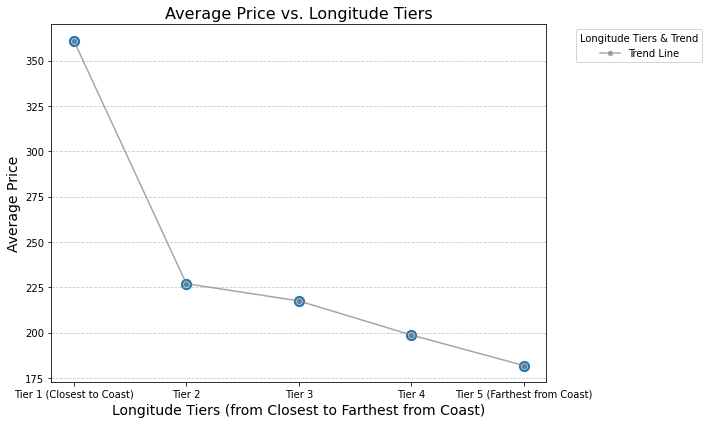

In [13]:
# Calculate average price for each longitude-based tier
tier_price_stats = san_diego.groupby('neighbourhood_cleansed').agg(
    avg_price=('price', 'mean'),
    avg_longitude=('longitude', 'mean')
).reset_index()

# Divide neighborhoods into 5 tiers based on average longitude (closer to the coast to farther)
tier_price_stats['tier'] = pd.qcut(tier_price_stats['avg_longitude'], 5, labels=["Tier 1 (Closest to Coast)", "Tier 2", "Tier 3", "Tier 4", "Tier 5 (Farthest from Coast)"])

# Calculate the average price for each tier
tier_avg_price = tier_price_stats.groupby('tier').agg(
    avg_price=('avg_price', 'mean')
).reset_index()

# Display the average prices for each tier
print("Average Prices for Each Longitude-Based Tier:")
print(tier_avg_price)

# Plot average prices vs. longitude tiers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tier_avg_price, x='tier', y='avg_price', palette='coolwarm', s=150)

# Overlay a line connecting the tiers
sns.lineplot(data=tier_avg_price, x='tier', y='avg_price', color='gray', marker='o', linestyle='-', label='Trend Line', alpha=0.7)

# Add labels and title
plt.title('Average Price vs. Longitude Tiers', fontsize=16)
plt.xlabel('Longitude Tiers (from Closest to Farthest from Coast)', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.legend(title='Longitude Tiers & Trend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipykernel_121/572304916.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_stats = neighborhood_stats.groupby('tier').agg(
/tmp/ipykernel_121/572304916.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_neighborhoods = neighborhood_stats.groupby('tier')['neighbourhood_cleansed'].apply(list)


Neighborhoods in Each Tier:
tier
Tier 1 (Lowest)     [Bonita Long Canyon, City Heights East, City H...
Tier 2              [Balboa Park, Bario Logan, Carmel Mountain, Ch...
Tier 3              [Alta Vista, Bay Ho, Bay Terrace, Columbia, Ea...
Tier 4              [Allied Gardens, Bird Land, Clairemont Mesa, E...
Tier 5 (Highest)    [Bay Park, Carmel Valley, Del Cerro, Del Mar H...
Name: neighbourhood_cleansed, dtype: object


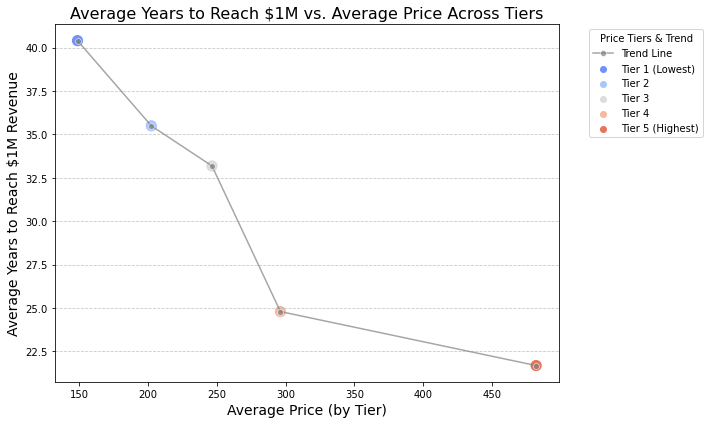

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated dataset with income and years_to_reach_1M columns
filtered_data = pd.read_csv('filtered_entire_home_data_with_income_and_years.csv')

# Ensure price and years_to_reach_1M are numeric
filtered_data['price'] = filtered_data['price'].astype(float)
filtered_data['years_to_reach_1M'] = pd.to_numeric(filtered_data['years_to_reach_1M'], errors='coerce')

# Group by neighborhood and calculate average price and years_to_reach_1M
neighborhood_stats = filtered_data.groupby('neighbourhood_cleansed').agg(
    avg_price=('price', 'mean'),
    avg_years_to_reach_1M=('years_to_reach_1M', 'mean')
).reset_index()

# Divide neighborhoods into 5 tiers based on average price
neighborhood_stats['tier'] = pd.qcut(neighborhood_stats['avg_price'], 5, labels=["Tier 1 (Lowest)", "Tier 2", "Tier 3", "Tier 4", "Tier 5 (Highest)"])

# Calculate average years_to_reach_1M for each tier
tier_stats = neighborhood_stats.groupby('tier').agg(
    avg_price=('avg_price', 'mean'),
    avg_years_to_reach_1M=('avg_years_to_reach_1M', 'mean')
).reset_index()

# Display neighborhoods in each tier
tier_neighborhoods = neighborhood_stats.groupby('tier')['neighbourhood_cleansed'].apply(list)
print("Neighborhoods in Each Tier:")
print(tier_neighborhoods)

# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tier_stats, x='avg_price', y='avg_years_to_reach_1M', hue='tier', palette='coolwarm', s=150)

# Overlay a line connecting the tiers
sns.lineplot(data=tier_stats, x='avg_price', y='avg_years_to_reach_1M', color='gray', marker='o', linestyle='-', label='Trend Line', alpha=0.7)

# Add labels and title
plt.title('Average Years to Reach $1M vs. Average Price Across Tiers', fontsize=16)
plt.xlabel('Average Price (by Tier)', fontsize=14)
plt.ylabel('Average Years to Reach $1M Revenue', fontsize=14)
plt.legend(title='Price Tiers & Trend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipykernel_121/1396585140.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_stats = neighborhood_stats.groupby('tier').agg(
/tmp/ipykernel_121/1396585140.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tier_neighborhoods = neighborhood_stats.groupby('tier')['neighbourhood_cleansed'].apply(list)


Neighborhoods in Each Tier:
tier
Tier 1 (Closest to coast)       [Bay Ho, Bay Park, Carmel Valley, Del Mar Heig...
Tier 2                          [Balboa Park, Bario Logan, Bird Land, Clairemo...
Tier 3                          [Allied Gardens, Chollas View, City Heights Ea...
Tier 4                          [Alta Vista, Carmel Mountain, College Area, Da...
Tier 5 (Farthest from coast)    [Bay Terrace, Bonita Long Canyon, East Lake, E...
Name: neighbourhood_cleansed, dtype: object


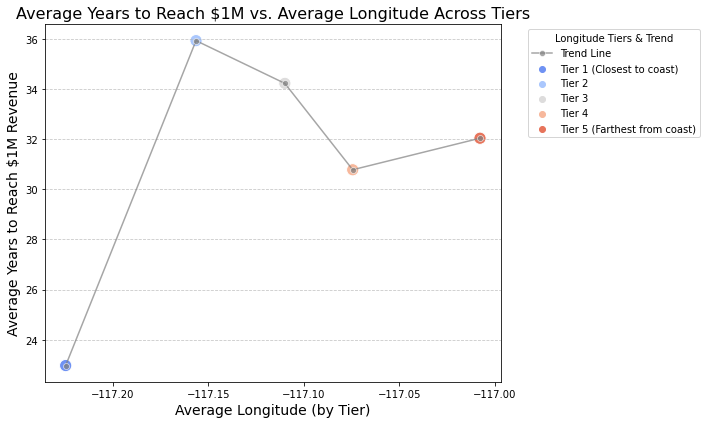

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated dataset with income and years_to_reach_1M columns
filtered_data = pd.read_csv('filtered_entire_home_data_with_income_and_years.csv')

# Ensure longitude and years_to_reach_1M are numeric
filtered_data['longitude'] = pd.to_numeric(filtered_data['longitude'], errors='coerce')
filtered_data['years_to_reach_1M'] = pd.to_numeric(filtered_data['years_to_reach_1M'], errors='coerce')

# Group by neighborhood and calculate average longitude and years_to_reach_1M
neighborhood_stats = filtered_data.groupby('neighbourhood_cleansed').agg(
    avg_longitude=('longitude', 'mean'),
    avg_years_to_reach_1M=('years_to_reach_1M', 'mean')
).reset_index()

# Divide neighborhoods into 5 tiers based on average longitude
neighborhood_stats['tier'] = pd.qcut(neighborhood_stats['avg_longitude'], 5, labels=["Tier 1 (Closest to coast)", "Tier 2", "Tier 3", "Tier 4", "Tier 5 (Farthest from coast)"])

# Calculate average years_to_reach_1M for each tier
tier_stats = neighborhood_stats.groupby('tier').agg(
    avg_longitude=('avg_longitude', 'mean'),
    avg_years_to_reach_1M=('avg_years_to_reach_1M', 'mean')
).reset_index()

# Display neighborhoods in each tier
tier_neighborhoods = neighborhood_stats.groupby('tier')['neighbourhood_cleansed'].apply(list)
print("Neighborhoods in Each Tier:")
print(tier_neighborhoods)

# Plot the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tier_stats, x='avg_longitude', y='avg_years_to_reach_1M', hue='tier', palette='coolwarm', s=150)

# Overlay a line connecting the tiers
sns.lineplot(data=tier_stats, x='avg_longitude', y='avg_years_to_reach_1M', color='gray', marker='o', linestyle='-', label='Trend Line', alpha=0.7)

# Add labels and title
plt.title('Average Years to Reach $1M vs. Average Longitude Across Tiers', fontsize=16)
plt.xlabel('Average Longitude (by Tier)', fontsize=14)
plt.ylabel('Average Years to Reach $1M Revenue', fontsize=14)
plt.legend(title='Longitude Tiers & Trend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipykernel_121/1083967432.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_tier_avg = price_tier_stats.groupby('price_tier')['avg_yearly_occupancy'].mean().reset_index()
/tmp/ipykernel_121/1083967432.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  longitude_tier_avg = longitude_tier_stats.groupby('longitude_tier')['avg_yearly_occupancy'].mean().reset_index()
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or o

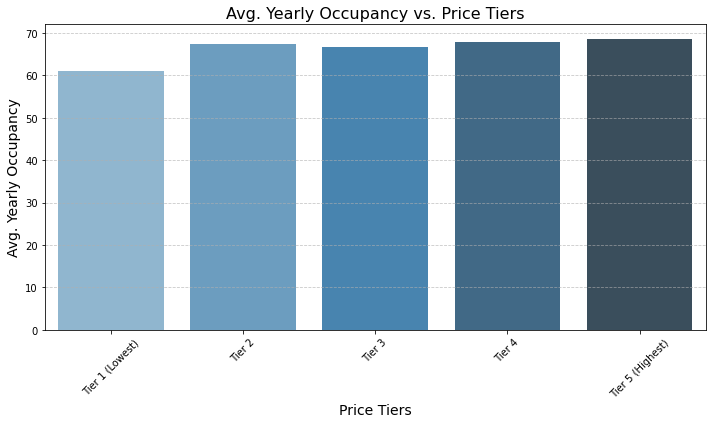

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


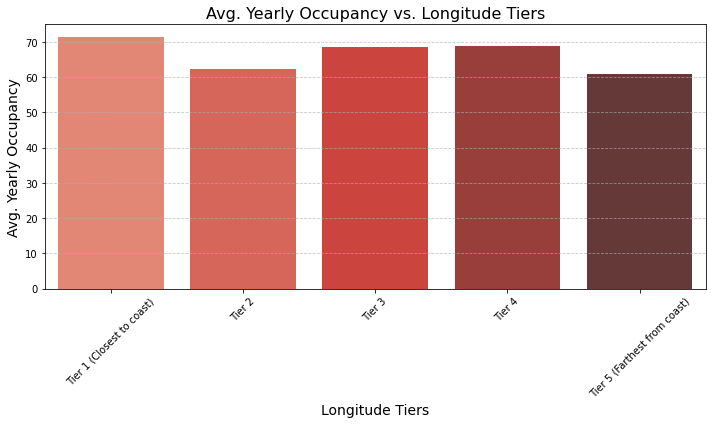

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
filtered_data = pd.read_csv('san_diego_listing_cleaned.csv')

# Ensure necessary columns are numeric
filtered_data['price'] = pd.to_numeric(filtered_data['price'], errors='coerce')
filtered_data['longitude'] = pd.to_numeric(filtered_data['longitude'], errors='coerce')
filtered_data['availability_30'] = pd.to_numeric(filtered_data['availability_30'], errors='coerce')

# Calculate average yearly occupancy
filtered_data['avg_yearly_occupancy'] = ((30 - filtered_data['availability_30']) * 1200) / 360

# Group neighborhoods by average price
price_tier_stats = filtered_data.groupby('neighbourhood_cleansed').agg(
    avg_price=('price', 'mean'),
    avg_yearly_occupancy=('avg_yearly_occupancy', 'mean')
).reset_index()

# Divide neighborhoods into price-based tiers
price_tier_stats['price_tier'] = pd.qcut(
    price_tier_stats['avg_price'], 5, labels=["Tier 1 (Lowest)", "Tier 2", "Tier 3", "Tier 4", "Tier 5 (Highest)"]
)

# Group neighborhoods by average longitude
longitude_tier_stats = filtered_data.groupby('neighbourhood_cleansed').agg(
    avg_longitude=('longitude', 'mean'),
    avg_yearly_occupancy=('avg_yearly_occupancy', 'mean')
).reset_index()

# Divide neighborhoods into longitude-based tiers
longitude_tier_stats['longitude_tier'] = pd.qcut(
    longitude_tier_stats['avg_longitude'], 5, labels=["Tier 1 (Closest to coast)", "Tier 2", "Tier 3", "Tier 4", "Tier 5 (Farthest from coast)"]
)

# Aggregate data by tiers
price_tier_avg = price_tier_stats.groupby('price_tier')['avg_yearly_occupancy'].mean().reset_index()
longitude_tier_avg = longitude_tier_stats.groupby('longitude_tier')['avg_yearly_occupancy'].mean().reset_index()

# Plotting Avg. Yearly Occupancy vs. Price Tiers
plt.figure(figsize=(10, 6))
sns.barplot(data=price_tier_avg, x='price_tier', y='avg_yearly_occupancy', palette='Blues_d')
plt.title('Avg. Yearly Occupancy vs. Price Tiers', fontsize=16)
plt.xlabel('Price Tiers', fontsize=14)
plt.ylabel('Avg. Yearly Occupancy', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting Avg. Yearly Occupancy vs. Longitude Tiers
plt.figure(figsize=(10, 6))
sns.barplot(data=longitude_tier_avg, x='longitude_tier', y='avg_yearly_occupancy', palette='Reds_d')
plt.title('Avg. Yearly Occupancy vs. Longitude Tiers', fontsize=16)
plt.xlabel('Longitude Tiers', fontsize=14)
plt.ylabel('Avg. Yearly Occupancy', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipykernel_121/2876113499.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_tier_avg = price_tier_stats.groupby('price_tier')['avg_yearly_occupancy'].mean().reset_index()
/tmp/ipykernel_121/2876113499.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  longitude_tier_avg = longitude_tier_stats.groupby('longitude_tier')['avg_yearly_occupancy'].mean().reset_index()
/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or o

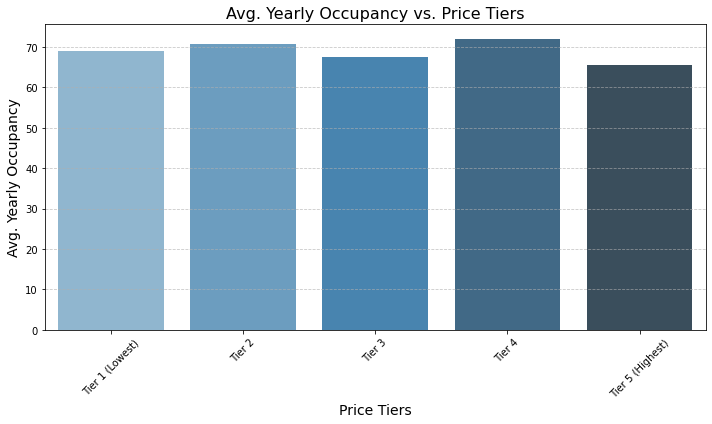

/opt/conda/lib/python3.9/site-packages/seaborn/categorical.py:253: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


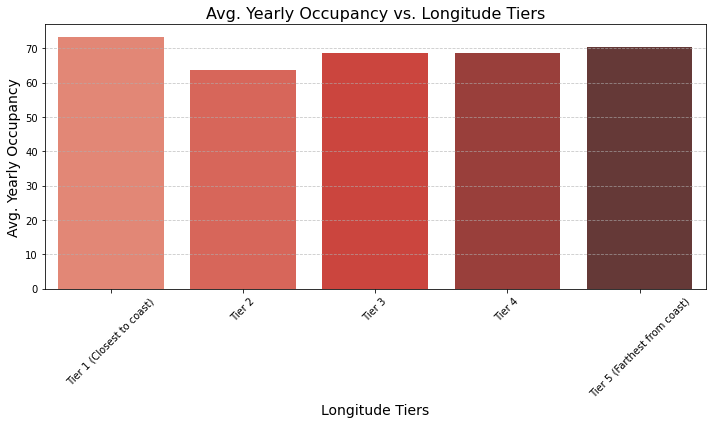

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
filtered_data = pd.read_csv('filtered_entire_home_data_with_income_and_years.csv')

# Ensure necessary columns are numeric
filtered_data['price'] = pd.to_numeric(filtered_data['price'], errors='coerce')
filtered_data['longitude'] = pd.to_numeric(filtered_data['longitude'], errors='coerce')
filtered_data['availability_30'] = pd.to_numeric(filtered_data['availability_30'], errors='coerce')

# Calculate average yearly occupancy
filtered_data['avg_yearly_occupancy'] = ((30 - filtered_data['availability_30']) * 1200) / 360

# Group neighborhoods by average price
price_tier_stats = filtered_data.groupby('neighbourhood_cleansed').agg(
    avg_price=('price', 'mean'),
    avg_yearly_occupancy=('avg_yearly_occupancy', 'mean')
).reset_index()

# Divide neighborhoods into price-based tiers
price_tier_stats['price_tier'] = pd.qcut(
    price_tier_stats['avg_price'], 5, labels=["Tier 1 (Lowest)", "Tier 2", "Tier 3", "Tier 4", "Tier 5 (Highest)"]
)

# Group neighborhoods by average longitude
longitude_tier_stats = filtered_data.groupby('neighbourhood_cleansed').agg(
    avg_longitude=('longitude', 'mean'),
    avg_yearly_occupancy=('avg_yearly_occupancy', 'mean')
).reset_index()

# Divide neighborhoods into longitude-based tiers
longitude_tier_stats['longitude_tier'] = pd.qcut(
    longitude_tier_stats['avg_longitude'], 5, labels=["Tier 1 (Closest to coast)", "Tier 2", "Tier 3", "Tier 4", "Tier 5 (Farthest from coast)"]
)

# Aggregate data by tiers
price_tier_avg = price_tier_stats.groupby('price_tier')['avg_yearly_occupancy'].mean().reset_index()
longitude_tier_avg = longitude_tier_stats.groupby('longitude_tier')['avg_yearly_occupancy'].mean().reset_index()

# Plotting Avg. Yearly Occupancy vs. Price Tiers
plt.figure(figsize=(10, 6))
sns.barplot(data=price_tier_avg, x='price_tier', y='avg_yearly_occupancy', palette='Blues_d')
plt.title('Avg. Yearly Occupancy vs. Price Tiers', fontsize=16)
plt.xlabel('Price Tiers', fontsize=14)
plt.ylabel('Avg. Yearly Occupancy', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting Avg. Yearly Occupancy vs. Longitude Tiers
plt.figure(figsize=(10, 6))
sns.barplot(data=longitude_tier_avg, x='longitude_tier', y='avg_yearly_occupancy', palette='Reds_d')
plt.title('Avg. Yearly Occupancy vs. Longitude Tiers', fontsize=16)
plt.xlabel('Longitude Tiers', fontsize=14)
plt.ylabel('Avg. Yearly Occupancy', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
